<a href="https://colab.research.google.com/github/ankitasak08/Machine-Learning-projects/blob/main/polyreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
dataset = pandas.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv', delimiter="\t")
dataset

,male,attended_training,age,body_fat_percentage,core_temperature,ate_at_tonys_steakhouse,needed_intensive_care,protein_content_of_last_meal
0,0,1,6.9,38,38.423169,0,0,7.66
1,0,1,5.4,32,39.015998,0,0,13.36
2,1,1,5.4,12,39.148341,0,0,12.90
3,1,0,4.8,23,39.060049,0,0,13.45
4,1,0,4.8,15,38.655439,0,0,10.53
...,...,...,...,...,...,...,...,...
93,0,0,4.5,38,37.939942,0,0,7.35
94,1,0,1.8,11,38.790426,1,1,12.18
95,0,0,6.6,20,39.489962,0,0,15.84
96,0,0,6.9,32,38.575742,1,1,9.79


##Linear regression

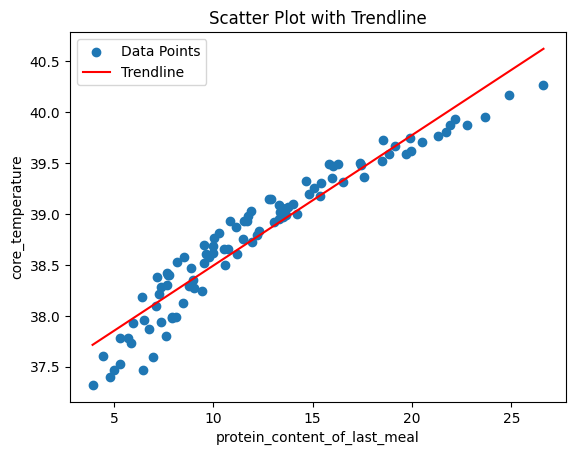

In [12]:
label_x, label_y = 'protein_content_of_last_meal', 'core_temperature'
x_data, y_data = dataset[label_x], dataset[label_y]

plt.scatter(x_data, y_data, label="Data Points")

model = smf.ols(f"{label_y} ~ {label_x}", data=dataset).fit()
x_fit, y_fit = np.linspace(x_data.min(), x_data.max(), 100), model.predict(dict(protein_content_of_last_meal=x_fit))
plt.plot(x_fit, y_fit, color='red', label="Trendline")

plt.xlabel(label_x)
plt.ylabel(label_y)
plt.title("Scatter Plot with Trendline")
plt.legend()
plt.show()



##Polynomial Regression

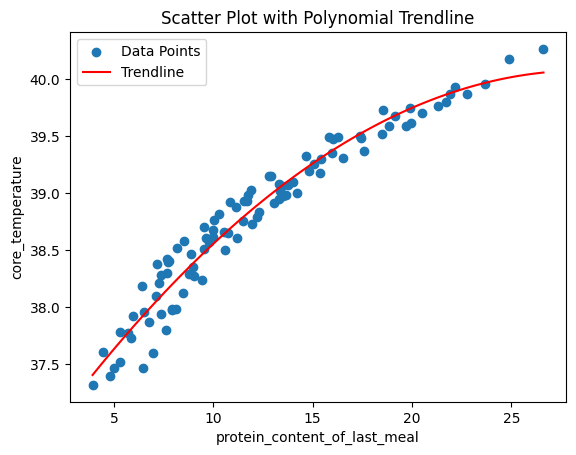

In [13]:
polynomial_formula = f"{label_y} ~ {label_x} + I({label_x}**2)"
polynomial_model = smf.ols(formula=polynomial_formula, data=dataset).fit()

plt.scatter(x_data, y_data, label="Data Points")

# Trendline using the polynomial model
x_fit = np.linspace(x_data.min(), x_data.max(), 100)
y_fit = polynomial_model.predict(dict(protein_content_of_last_meal=x_fit))
plt.plot(x_fit, y_fit, color='red', label="Trendline")

plt.xlabel(label_x)
plt.ylabel(label_y)
plt.title("Scatter Plot with Polynomial Trendline")
plt.legend()
plt.show()


## **3-D Plot**

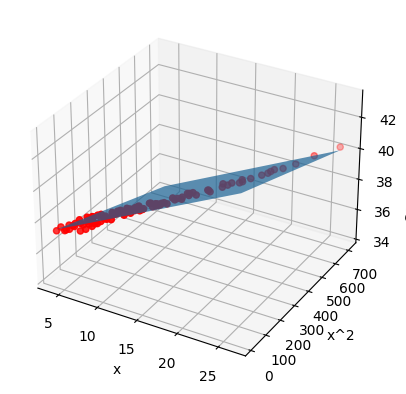

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_values = np.array([min(dataset.protein_content_of_last_meal), max(dataset.protein_content_of_last_meal)])
y_values = np.array([min(dataset.protein_content_of_last_meal)**2, max(dataset.protein_content_of_last_meal)**2])

# Create a meshgrid for x and y values
x, y = np.meshgrid(x_values, y_values)

# Calculate the z values using the polynomial model
z = polynomial_model.params[0] + (polynomial_model.params[1] * x) + (polynomial_model.params[2] * y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, alpha=0.7)

# Plot the data points
ax.scatter(dataset.protein_content_of_last_meal, dataset.protein_content_of_last_meal**2, dataset.core_temperature, c='r', marker='o')

# Set axis labels
ax.set_xlabel('x')
ax.set_ylabel('x^2')
ax.set_zlabel('Core temperature')

# Show the plot
plt.show()
